<a href="https://colab.research.google.com/github/dim447/data_analyst/blob/main/FitoFarm01_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи исследования**

### Загружаем данные и объединяем три датасета - ОЗОН позволяется выгружать данные за 3 месяца.



*1. Осмотр данных*
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии



*2. Обработка данных*
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить месяц - вместо даты название месяца
- посмотреть разную статистику, связь товара и склада отгрузки,региона доставки


*3. Ответы на вопросы*
- Какой самый популярный чай? Укажите наиболее важные характеристики
и постройте графики?
- Какую сумму приносит каждая позиция?
- Какие регионы больше всего покупают, какие склады использовать?
- Как загружены склады отгрузки?
- Проверим, куда больше отправляют товар по каждой позиции!



*4. Результаты исследования*
- Общие выводы
- Рекомендации


*Описание данных:*

*   'Дата отгрузки' - Дата отгрузки товара
*   'Месяц отгрузки' - Месяц выделяем из даты
*   'Наименование товара' - Наименование товара
*   'Итоговая стоимость товара' - Сумма продажи товара
*   'Количество' - Количество отгруженного товара
*   'Кластер отгрузки' - Логистика ОЗОН
*   'Кластер доставки' - Логистика ОЗОН
*   'Склад отгрузки' - Склад отгрузки ОЗОН
*   'Регион доставки' - Регион доставки товара
*   'Город доставки' - Город доставки товара (не всегда указан)


In [25]:
### Загружаем данные и объединяем три датасета
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df01 = pd.read_csv('/content/orders01_03.csv', sep=';')
df02 = pd.read_csv('/content/orders04_06.csv', sep=';')
df03 = pd.read_csv('/content/orders07_09.csv', sep=';')
df04 = pd.read_csv('/content/orders01-03-22.csv', sep=';')
df05 = pd.read_csv('/content/orders04-06-22.csv', sep=';')
df06 = pd.read_csv('/content/orders07-09-22.csv', sep=';')
df07 = pd.read_csv('/content/orders10-12-22.csv', sep=';')
df = pd.concat([df01, df02, df03, df04, df05, df06, df07])
df.shape


(6739, 32)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739 entries, 0 to 1645
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Номер заказа                 6739 non-null   object 
 1   Номер отправления            6739 non-null   object 
 2   Принят в обработку           6739 non-null   object 
 3   Дата отгрузки                6664 non-null   object 
 4   Статус                       6739 non-null   object 
 5   Дата доставки                6391 non-null   object 
 6   Сумма отправления            6739 non-null   float64
 7   Код валюты отправления       6739 non-null   object 
 8   Наименование товара          6739 non-null   object 
 9   OZON id                      6739 non-null   int64  
 10  Артикул                      6739 non-null   int64  
 11  Итоговая стоимость товара    6739 non-null   float64
 12  Код валюты товара            6739 non-null   object 
 13  Количество        

In [27]:
df.head(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
0,32901413-0114,32901413-0114-1,2023-03-31 19:48:33,2023-04-01 02:00:00,Доставлен,2023-04-05 11:24:30,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1,33790736-0039,33790736-0039-2,2023-03-31 19:10:52,2023-04-01 01:00:00,Доставлен,2023-04-01 17:18:39,318.0,RUB,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",520745178,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
2,32901413-0113,32901413-0113-1,2023-03-31 11:17:55,2023-04-01 02:00:00,Отменен,NaN,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
3,31169688-0104,31169688-0104-1,2023-03-31 10:46:57,2023-04-01 01:30:00,Доставлен,2023-04-06 11:15:52,260.0,RUB,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",520746323,...,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань,ПВЗ,Премиум,нет,Ozon Карта,NaN
4,33007656-0150,33007656-0150-2,2023-03-31 08:43:59,2023-04-06 01:00:00,Доставлен,2023-04-07 06:31:46,157.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN


In [28]:
df.tail(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
1641,10071214-0308,10071214-0308-1,2022-10-01 10:06:24,2022-10-02 11:00:00,Доставлен,2022-10-04 15:42:51,181.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Поволжье,Московская область Восток (Недействительный),КАЗАНЬ_РФЦ_НОВЫЙ,Московская Область,Балашиха,ПВЗ,Не премиум,нет,Картой онлайн,NaN
1642,30449332-0113,30449332-0113-2,2022-10-01 09:02:32,2022-10-02 06:00:00,Доставлен,2022-10-06 15:25:46,181.0,RUB,Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /...,482738956,...,Санкт-Петербург и СЗО,Московская область Юг (Недействительный),САНКТ-ПЕТЕРБУРГ_РФЦ,Московская Область,NaN,ПВЗ,Премиум,нет,Ozon Карта,NaN
1643,56580807-0054,56580807-0054-3,2022-10-01 07:59:09,2022-10-05 17:00:00,Доставлен,2022-10-10 08:40:08,181.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Поволжье,Ленинградская область (Недействительный),КАЗАНЬ_РФЦ_НОВЫЙ,Ленинградская Область,Выборг,Курьер,Не премиум,нет,Картой онлайн,NaN
1644,11226227-0295,11226227-0295-27,2022-10-01 06:49:45,2022-10-02 06:00:00,Доставлен,2022-10-07 17:02:40,180.0,RUB,Чай травяной Домбайский вальс Лесные ягоды ф/п...,482741307,...,Санкт-Петербург и СЗО,Московская область Восток (Недействительный),САНКТ-ПЕТЕРБУРГ_РФЦ,Московская Область,Раменское,ПВЗ,Премиум,нет,Картой онлайн,NaN
1645,11226227-0295,11226227-0295-7,2022-10-01 06:49:45,2022-10-01 15:30:00,Доставлен,2022-10-02 14:30:20,171.0,RUB,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,482743745,...,"Москва, МО и дальние регионы",Московская область Восток (Недействительный),ПУШКИНО_1_РФЦ,Московская Область,Раменское,ПВЗ,Премиум,нет,Картой онлайн,NaN


In [29]:
df.columns

Index(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата отгрузки', 'Статус', 'Дата доставки', 'Сумма отправления',
       'Код валюты отправления', 'Наименование товара', 'OZON id', 'Артикул',
       'Итоговая стоимость товара', 'Код валюты товара', 'Количество',
       'Стоимость доставки', 'Связанные отправления', 'Выкуп товара',
       'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
       'Объемный вес товаров, кг', 'Кластер отгрузки', 'Кластер доставки',
       'Склад отгрузки', 'Регион доставки', 'Город доставки',
       'Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
       'Способ оплаты', 'Штрихкод ювелирного изделия'],
      dtype='object')

In [30]:
### Убираем ненужные колонки и выбираем случайные 5 записей
# df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
#        'Дата доставки', 'Сумма отправления',
#        'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
#        'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
#        'Объемный вес товаров, кг','Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
#        'Способ оплаты', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата доставки',
       'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
       'Объемный вес товаров, кг', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
# df = df.drop(['Стоимость доставки'], axis=1)

df.sample(5)

,Дата отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
237,2023-03-12 21:00:00,Доставлен,135.0,Чай травяной Имбирь с облепихой ф/п 1.5г №20 /...,135.0,1,305.5,56%,170.5,"Системная виртуальная скидка селлера, Скидка О...",Центр и дальние регионы,Московская область Юг (Недействительный),ПУШКИНО_1_РФЦ,Московская Область,Серпухов,ПВЗ,Не премиум,нет,Ozon Карта
176,2022-09-23 15:30:00,Отменен,80.0,Чай травяной Женская линия Лактомол ф/п 1.5г №...,80.0,1,340.0,76%,260.0,"Системная виртуальная скидка селлера, СуперХит...","Москва, МО и дальние регионы",Московская область Север (Недействительный),ПУШКИНО_2_РФЦ,Московская Область,Химки,ПВЗ,Не премиум,нет,Картой онлайн
1498,2022-10-13 11:00:00,Доставлен,181.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,181.0,1,339.0,47%,158.0,"Системная виртуальная скидка селлера, Маркетпл...",Юг,Санкт-Петербург Юг,ВОРОНЕЖ_МРФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Премиум,нет,Картой онлайн
1180,2022-10-31 23:00:00,Доставлен,171.0,Чай травяной Друг Вашей поджелудочной железы ф...,171.0,1,339.0,50%,168.0,"✨Pharmacy + Non-Food Скидки от 10 % , Системна...",Юг,Воронеж,ВОРОНЕЖ_МРФЦ,Воронежская Область,Бобров,ПВЗ,Не премиум,нет,Ozon Карта
325,2023-03-10 17:00:00,Доставлен,850.0,"Экстракт трав в капсулах ""Друг вашей поджелудо...",850.0,1,1350.0,37%,500.0,Системная виртуальная скидка селлера,Юг,Белгород,НОВОРОССИЙСК_МРФЦ,Белгородская Область,NaN,Курьер,Не премиум,нет,Картой онлайн


In [31]:
### Пересохраняем данные без статуса  'Отменен', если нужно проанализировать отмененные заказы,
### меняем условие в запросе df_cancel = df.loc[df['Статус'] == 'Отменен']
df = df.loc[df['Статус'] != 'Отменен']
df.shape

(6502, 19)

In [32]:
### Посчитаем статистику после того, как мы удалили отмененные заказы: Стоимость и количество
df.describe()

,Сумма отправления,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка руб
count,6502.000000,6502.000000,6502.000000,6502.000000,6502.000000
mean,189.471861,184.955880,1.026607,375.396435,195.503922
std,107.227463,97.279084,0.237403,172.368719,114.299667
min,47.500000,47.500000,1.000000,229.000000,80.000000
25%,155.000000,155.000000,1.000000,310.000000,155.000000
50%,162.000000,162.000000,1.000000,339.000000,168.000000
75%,181.000000,181.000000,1.000000,350.000000,190.000000
max,1664.680000,950.000000,8.000000,2233.000000,3980.000000


In [35]:
# # Применим сортировку по месяцам, изначально сортировка была по алфавиту, что не очень удобно.
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")
# df['Дата отгрузки']
# df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
df.insert(1, 'Год_отгрузки', df['Дата отгрузки'].dt.year)
# df.insert(2, 'Месяц отгрузки', df['Дата отгрузки'].dt.month_name())
df = df.drop(['Дата отгрузки'], axis=1)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Месяц отгрузки'] = pd.Categorical(df['Месяц отгрузки'], categories=months, ordered=True)
df.sample(5)


,Год_отгрузки,Месяц отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
421,2022.0,December,Доставлен,126.00,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,126.00,1,281.00,55%,155.0,"😷PH//Скидки от 15 % на всю аптеку, Системная в...","Москва, МО и дальние регионы",Москва Юг (Недействительный),ПУШКИНО_1_РФЦ,Москва,Москва,ПВЗ,Не премиум,нет,Ozon Карта
147,2023.0,March,Доставлен,120.00,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,120.00,1,310.00,61%,190.0,"Хиты марта , Системная виртуальная скидка селлера",Москва и МО,Московская область Восток (Недействительный),ПУШКИНО_2_РФЦ,Московская Область,Ногинск,ПВЗ,Не премиум,нет,Картой онлайн
404,2023.0,September,Доставлен,866.00,"Экстракт трав в капсулах ""Друг вашей поджелудо...",866.00,1,1552.00,44%,686.0,"Системная виртуальная скидка селлера, Хиты Рас...",Поволжье,Нижний Новгород,САМАРА_РФЦ,Нижегородская Область,Нижний Новгород,ПВЗ,Премиум,нет,Ozon Карта
97,2022.0,December,Доставлен,153.75,Чай травяной Друг Вашей поджелудочной железы ф...,153.75,1,302.75,49%,149.0,"Системная виртуальная скидка селлера, Хиты. Но...",Поволжье,Московская область Юг (Недействительный),НИЖНИЙ_НОВГОРОД_РФЦ,Московская Область,Видное,ПВЗ,Премиум,нет,Ozon Карта
204,2023.0,March,Доставлен,169.00,Чай травяной Друг Вашего давления ф/п 1.5г №20...,169.00,1,350.00,52%,181.0,"✨PH// Большие скидки на аптеку , Системная вир...",Поволжье,Самара,САМАРА_РФЦ,Самарская Область,Самара,ПВЗ,Не премиум,нет,Картой онлайн


In [58]:
### Ищем нулевые ячейки, нас интересует месяц отгрузки и дата отгрузки
df.isnull().sum().sort_values()

Год_отгрузки                   0
Сегмент клиента                0
Способ доставки                0
Склад отгрузки                 0
Кластер доставки               0
Акции                          0
Юридическое лицо               0
Скидка %                       0
Скидка руб                     0
Количество                     0
Итоговая стоимость товара      0
Наименование товара            0
Сумма отправления              0
Статус                         0
Месяц отгрузки                 0
Цена товара до скидок          0
Способ оплаты                  0
Регион доставки               44
Кластер отгрузки             793
Город доставки               808
dtype: int64

In [59]:
# Нулевые год отгрузки и месяц отгрузки заменили на 2023 и Сентябрь
# df['Год_отгрузки']= df['Год_отгрузки'].fillna('2023')
# df['Год_отгрузки']= df['Год_отгрузки'].astype(int)
# df.dtypes
# df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
df.sample(5)
# df[df.isnull().any(1)]

,Год_отгрузки,Месяц отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
1016,2023,July,Доставлен,161.0,Чай травяной Друг Ваших почек ф/п 1.5г №20 /20...,161.0,1,350.0,54%,189.0,Летняя распродажа одежды и не только. СуперХит...,"Москва, МО и дальние регионы",Ярославль,ПУШКИНО_1_РФЦ,Ярославская Область,Ярославль,ПВЗ,Не премиум,нет,Ozon Карта
546,2023,September,Доставлен,164.0,Чай травяной Друг Вашей памяти ф/п 1.5г №20 / ...,164.0,1,350.0,53%,186.0,"Хиты Распродажио, Системная виртуальная скидка...",Центр,Казань,ТВЕРЬ_РФЦ,Татарстан Республика,Зеленодольск,ПВЗ,Не премиум,нет,Ozon Карта
667,2023,April,Доставлен,179.0,"Чайный напиток травяной листья Брусники ф/п 1,...",179.0,1,350.0,49%,171.0,"Системная виртуальная скидка селлера, Food_Гло...",Центр и дальние регионы,Московская область Запад (Недействительный),ПУШКИНО_1_РФЦ,Московская Область,NaN,ПВЗ,Не премиум,нет,Ozon Карта
264,2023,March,Доставлен,170.0,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,170.0,1,350.0,51%,180.0,"✨PH// Большие скидки на аптеку , Системная вир...",Санкт-Петербург и СЗО,Санкт-Петербург Юг,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Премиум,нет,Ozon Карта
905,2023,August,Доставлен,164.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,164.0,1,350.0,53%,186.0,"Системная виртуальная скидка селлера, Хиты Рас...","Москва, МО и дальние регионы",Москва ЮАО 2,ЖУКОВСКИЙ_РФЦ,Москва,Москва,ПВЗ,Не премиум,нет,Система Быстрых Платежей


In [60]:
# теперь можем видеть количество товара отгруженного по месяцам
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count()

Месяц отгрузки
January       461
February      424
March         533
April         494
May           461
June          386
July          489
August        610
September    1069
October       477
November      575
December      523
Name: Количество, dtype: int64

<Axes: xlabel='Месяц отгрузки'>

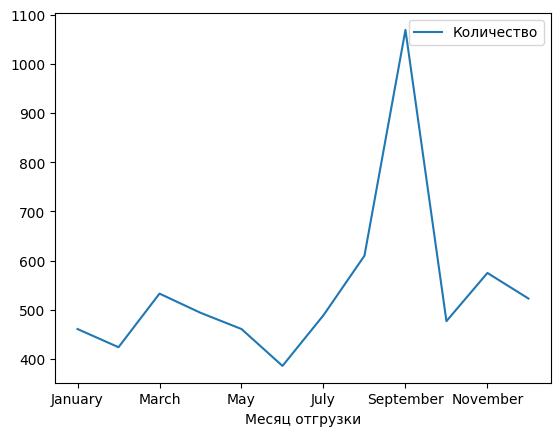

In [61]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count().plot(legend=True)

In [62]:
# а также сумму, не всегда большее количество соответсвует большей сумме
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Месяц отгрузки
January       82464.00
February      92667.18
March         96802.38
April         88976.82
May           82033.05
June          76624.50
July          98381.25
August       117665.00
September    192092.69
October       84708.25
November      97182.01
December      92986.00
Name: Итоговая стоимость товара, dtype: float64

<Axes: xlabel='Месяц отгрузки'>

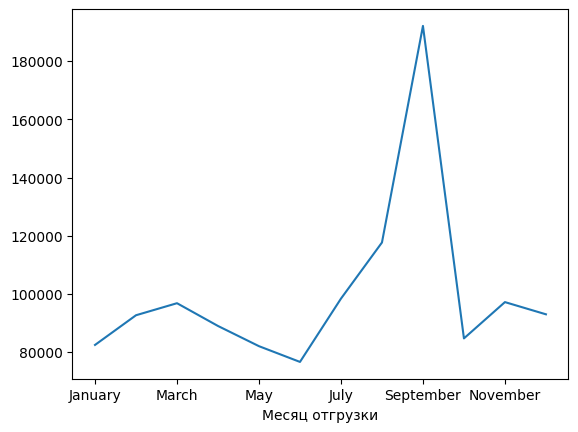

In [63]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum().plot()

In [40]:
### Выведем общую сумму продаж
df['Итоговая стоимость товара'].sum()

1202583.13

In [41]:
### Дубликаты есть, потому названия товара повторяются
df.duplicated().sum()

830

In [65]:
# Склад отгрузки нет нулевых значений, посмотрим уникальные названия
df['Склад отгрузки'].unique()

array(['АДЫГЕЙСК_РФЦ', 'СПБ_БУГРЫ_РФЦ', 'ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ',
       'ПУШКИНО_2_РФЦ', 'САМАРА_РФЦ', 'ПУШКИНО_1_РФЦ', 'ВОРОНЕЖ_МРФЦ',
       'НИЖНИЙ_НОВГОРОД_РФЦ', 'КАЗАНЬ_РФЦ_НОВЫЙ', 'РОСТОВ-НА-ДОНУ_РФЦ',
       'НОВОСИБИРСК_РФЦ_НОВЫЙ', 'FRESH_MAX_РСТ_ШОЛОХОВО',
       'САНКТ-ПЕТЕРБУРГ_РФЦ', 'КАЛИНИНГРАД_МРФЦ', 'НОВОРОССИЙСК_МРФЦ',
       'FRESH_MAX_РСТ_ЗАПАДНЫЙ', 'КРАСНОЯРСК_МРФЦ', 'ХОРУГВИНО_РФЦ',
       'FRESH_MAX_КДР_ПОНОМАРЕНКО', 'ТВЕРЬ_РФЦ', 'FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ',
       'ЖУКОВСКИЙ_РФЦ', 'FRESH_MAX_КДР_МЕДИА_ПЛАЗА', 'СПБ_ШУШАРЫ_РФЦ',
       'СОФЬИНО_РФЦ', 'НОВАЯ_РИГА_РФЦ'], dtype=object)

In [66]:
# Посмотрим откуда больше всего отгружается товар и отсортируем его по убыванию
sklad_otgruzki = df.groupby('Склад отгрузки')['Количество'].count()
sklad_otgruzki.sort_values(ascending=False)

Склад отгрузки
НОВАЯ_РИГА_РФЦ               787
ПУШКИНО_1_РФЦ                735
РОСТОВ-НА-ДОНУ_РФЦ           667
НИЖНИЙ_НОВГОРОД_РФЦ          619
САМАРА_РФЦ                   602
ВОРОНЕЖ_МРФЦ                 428
СПБ_БУГРЫ_РФЦ                422
ХОРУГВИНО_РФЦ                409
САНКТ-ПЕТЕРБУРГ_РФЦ          342
ПУШКИНО_2_РФЦ                313
ЖУКОВСКИЙ_РФЦ                255
ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ       171
НОВОРОССИЙСК_МРФЦ            168
КАЗАНЬ_РФЦ_НОВЫЙ             155
ТВЕРЬ_РФЦ                    142
АДЫГЕЙСК_РФЦ                 114
СПБ_ШУШАРЫ_РФЦ                82
НОВОСИБИРСК_РФЦ_НОВЫЙ         31
КРАСНОЯРСК_МРФЦ               30
СОФЬИНО_РФЦ                   22
КАЛИНИНГРАД_МРФЦ               2
FRESH_MAX_КДР_ПОНОМАРЕНКО      2
FRESH_MAX_КДР_МЕДИА_ПЛАЗА      1
FRESH_MAX_РСТ_ШОЛОХОВО         1
FRESH_MAX_РСТ_ЗАПАДНЫЙ         1
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ         1
Name: Количество, dtype: int64

In [67]:
# Регион доставки можем также отсортировать,
# 14 нулевых значений не играют большой роли, это скорее всего еще не доставленные товары
reg_deliver = df.groupby(['Регион доставки'])['Количество'].count().sort_values(ascending=False)
reg_deliver.head(20)

Регион доставки
Москва                     1222
Московская Область         1066
Санкт-Петербург             626
Краснодарский Край          529
Ленинградская Область       258
Ростовская Область          230
Татарстан Республика        191
Самарская Область           167
Воронежская Область         146
Нижегородская Область       121
Волгоградская Область        83
Тульская Область             77
Тверская Область             72
Владимирская Область         71
Белгородская Область         65
Ставропольский Край          62
Свердловская Область         57
Республика Коми              56
Саратовская Область          56
Калининградская Область      53
Name: Количество, dtype: int64

In [68]:
# Проверим, что самое популярное из товара, отсортируем продажи по Наименованию и количеству продаж.
df.groupby('Наименование товара')['Количество'].count().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           991
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             820
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              424
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    352
Чай травяной Домбайский вальс Облепиха ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай                          338
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             318
Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД                             315
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          315
Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай

In [69]:
### Отсортируем Товар по сумме продаж.
df.groupby('Наименование товара')['Итоговая стоимость товара'].sum().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           161868.85
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             134726.25
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                               71257.71
Экстракт трав в капсулах "Друг вашей поджелудочной железы", 60 капсул, БАД                                    67821.34
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор     58299.60
Чай травяной Домбайский вальс Облепиха ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай                           54679.87
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              52477.61
Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД                              51492.06
Чай травяной Друг Вашего дав

In [71]:
# Проверим откуда и куда больше отправляют товар, отсортируем Склад отгрузки  и Регион доставки
# df.rename(columns={"Склад отгрузки": "Склад_отгрузки", "Регион доставки": "Регион_доставки"}, inplace=True)
name_region = df.groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
# Можно выгрузить данные по "Склад" - "Регион" в файл excel
name_region.to_excel("output.xlsx")
name_region


Склад отгрузки             Регион доставки                         
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Волгоградская Область                       1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Краснодарский Край                          1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Краснодарский Край                          2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Ростовская Область                          1
FRESH_MAX_РСТ_ШОЛОХОВО     Ростовская Область                          1
                                                                      ..
ХОРУГВИНО_РФЦ              Ханты-Мансийский Автономный округ - Югра    1
                           Чеченская Республика                        3
                           Чувашская Республика - Чувашия              1
                           Ямало-Ненецкий Автономный округ             1
                           Ярославская Область                         2
Name: Количество, Length: 639, dtype: int64

In [72]:
# Анализ доставки в регионы по каждому складу - 'ХОРУГВИНО_РФЦ'
name_region_horugvino = df[df['Склад отгрузки'] == 'ХОРУГВИНО_РФЦ'].groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
name_region_horugvino.sort_values(ascending=False)

Склад отгрузки  Регион доставки                         
ХОРУГВИНО_РФЦ   Москва                                      138
                Московская Область                          112
                Санкт-Петербург                              19
                Краснодарский Край                           13
                Самарская Область                            13
                Татарстан Республика                         11
                Владимирская Область                         10
                Ленинградская Область                         9
                Рязанская Область                             7
                Республика Коми                               7
                Саратовская Область                           6
                Нижегородская Область                         4
                Калининградская Область                       4
                Калужская Область                             3
                Мурманская Область             

In [ ]:
# Анализ доставки в регионы по каждому складу - 'АДЫГЕЙСК_РФЦ'
name_region_adygey = df[df['Склад_отгрузки'] == 'АДЫГЕЙСК_РФЦ'].groupby(['Склад_отгрузки', 'Регион_доставки'])['Количество'].count()
name_region_adygey.sort_values(ascending=False)

Склад_отгрузки  Регион_доставки                    
АДЫГЕЙСК_РФЦ    Краснодарский Край                     63
                Ростовская Область                     10
                Воронежская Область                     9
                Волгоградская Область                   8
                Ставропольский Край                     6
                Республика Северная Осетия - Алания     3
                Санкт-Петербург                         2
                Белгородская Область                    2
                Республика Ингушетия                    2
                Астраханская Область                    1
                Тюменская Область                       1
                Сахалинская Область                     1
                Псковская Область                       1
                Пермский Край                           1
                Московская Область                      1
                Крым Республика                         1
                Воло

In [73]:
# Проверим откуда больше отправляют товар, отсортируем Наименование и Склад отгрузки
name_tea_by_storage = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Склад отгрузки'])['Количество'].count()
name_tea_by_storage.sort_values(ascending=False)

Наименование товара                                                                 Склад отгрузки        
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  САМАРА_РФЦ                114
                                                                                    НОВАЯ_РИГА_РФЦ            113
                                                                                    НИЖНИЙ_НОВГОРОД_РФЦ       108
                                                                                    ПУШКИНО_1_РФЦ             106
                                                                                    ВОРОНЕЖ_МРФЦ               97
                                                                                    РОСТОВ-НА-ДОНУ_РФЦ         96
                                                                                    ХОРУГВИНО_РФЦ              57
                                                                                    ЖУКОВСКИЙ_Р

In [74]:
# Проверим куда больше отправляют товар, отсортируем Наименование и регион доставки
name_tea_by_region = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Регион доставки'])['Количество'].count()
name_tea_by_region.sort_values(ascending=False)


Наименование товара                                                                 Регион доставки         
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  Московская Область          176
                                                                                    Москва                      171
                                                                                    Санкт-Петербург              91
                                                                                    Краснодарский Край           78
                                                                                    Ростовская Область           33
                                                                                                               ... 
                                                                                    Алматинская область           1
                                                                               

In [75]:
# Еще один параметр - склад отгрузки. Какой товар больше отправляют с какого склада.
name_sklad = df.groupby(['Склад отгрузки', 'Наименование товара'])['Количество'].count()
name_sklad.head(50)

Склад отгрузки             Наименование товара                                                                                      
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_РСТ_ШОЛОХОВО     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
АДЫГЕЙСК_РФЦ               Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая                                             1
                           Фитосб

In [76]:
# Также можно вывести отдельно по каждой позиции статистику по месяцам: Количество и Сумму.
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Количество'].count()

Наименование товара  Месяц отгрузки
False                January           407
                     February          381
                     March             449
                     April             407
                     May               407
                     June              315
                     July              412
                     August            497
                     September         924
                     October           368
                     November          481
                     December          463
True                 January            54
                     February           43
                     March              84
                     April              87
                     May                54
                     June               71
                     July               77
                     August            113
                     September         145
                     October           109
                  

In [77]:
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Наименование товара  Месяц отгрузки
False                January            74387.00
                     February           85064.66
                     March              83765.02
                     April              75455.34
                     May                73581.11
                     June               64904.00
                     July               85243.26
                     August             98372.42
                     September         168075.02
                     October            65593.63
                     November           82603.57
                     December           83669.25
True                 January             8077.00
                     February            7602.52
                     March              13037.36
                     April              13521.48
                     May                 8451.94
                     June               11720.50
                     July               13137.99
                     August      

# 4. Результаты исследования

### Общие выводы
С помощью данного инструмента (pandas) мы можем провести анализ как по каждой позиции - количество продаж, сумма, с какого склада и в какой регион больше отправка, так и видеть общую картину в целом. Определять пик продаж по месяцам, а нужно и по неделям. Группировать продажи, комбинировать разные параметры. Визуализация позволяет строить как обычные графики, так и в виде гистограм, круговых диаграм. Данный пример показывает возможности обработки данных его анализа и вывода результатов. Также возможен вывод данных в любой удобный формат, как ecxel, csv, json.
### Рекомендации
1.   Рекомендовать увеличить поставки наиболее продаваемого товара
2.   Использовать скидки в месяцы с наименьшими продажами
3.   В летние месяцы спад продаж, осенью и зимой больше затаривать склады
4.   Больше поставлять товар в регионы, но и не забывать про центр и северо-запад.



